<a href="https://colab.research.google.com/github/choyoungeun/Numerical-Methods/blob/main/c_float_code_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   부동 소수점의 표현 방법에 대해서는 IEEE754에서 32bit single-precision과 64bit double-precision 표준을 정하고 있는데 이것이 바로 float와 double의 규격이다.
*   기본적인 구조는 최상의 비트는 부호를 표시하는데 사용하고 지수부분(Exponet)과 가수부분(Fraction/Mantissa)로 구성되어 있다. 
*부호비트는 0일 경우 양수, 1일 경우 음수를 의미하며,
* 지수부(Exponent)는 기준값(Bias)을 중심으로 +, -값을 표현한다. 기준값은 2<sup>0</sup>를 의미하는데 float의 경우 기준값이 127이고, double의 경우 기준값은 1023이다. 
* 예를 들어, float에서 2<sup>1</sup>은 기준값(127) + 1 = 128이기 때문에 이진수로 표현하면 10000000<sub>2</sub>가 된다. 
* 가수부(Mantissa)는 1.xxxx 형태로 정규화를 한 뒤 가장 왼쪽에 있는 1을 제거하고 소수점 이하의 자리 값만 표현한다. 


* 예를 들어, 13.5를 32bit 부동소수점 (float)으로 표현해보자. 
  - 13.5 → 1101.1<sub>2</sub> [진수변환]
  - 1101.1<sub>2</sub> → 1.1011<sub>2</sub> x 2<sup>3<sup> [정규화]
  - 부호비트는 양수이므로 0,
  - 지수부는 3이므로 127 + 3 = 130, 2진수로 표현하면 10000010,
  - 가수부는 1.1011에서 소수점 이하 자리만 표현하면 1011이 된다. 
  - 최종 값은 0100 0001 0101 1000 0000 0000 0000
  





***64bit 버전***

온라인 C언어 컴파일러 https://repl.it/languages/c

#include <stdio.h>
void PrintBit(unsigned long long uNumber, int size);

int main(void) { double fNumber = 0; unsigned long long uTemp = 0;

fNumber = 13.5;

printf("\n[%f] 이거 비트가 어떻게 되냐면... \n", fNumber);

// fNumber의 주소를 unsigned형 포인터로 변환하여 fNumber를 컴파일러가
// unsigned 자료형으로 착각하게 만든다.
uTemp = *(unsigned long long *)&fNumber;

PrintBit(uTemp, sizeof(fNumber));

return 0;
}

// 넘겨받은 unsigned 형의 정수를 비트 단위로 출력한다. // 넘겨받은 size 값으로 float, double, long double을 구분한다. 

void PrintBit(unsigned long long uNumber, int size) { 
  int i = 0; int j = 0;

  for (i = size; i > 0 ; i--)
  {
      for (j = i*8-1; j >= (i-1)*8; j--)
      {
          printf("%d", (uNumber & ((unsigned long long)1 << j)) ? 1 : 0);
      }
      printf(" ");
  }
  puts("\n");
}

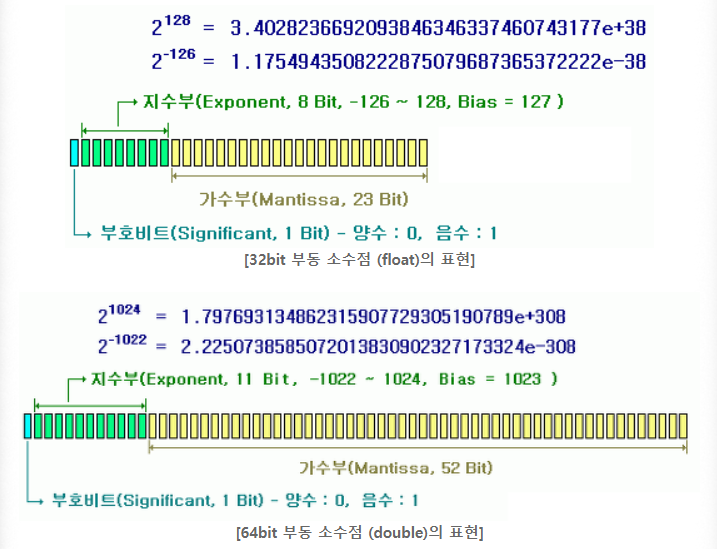

**32bit 버전**

온라인 C언어 컴파일러
https://repl.it/languages/c


#include <stdio.h>

void PrintBit(unsigned uNumber, int size);

int main(void)
{
    float fNumber = 0;
    unsigned uTemp = 0;

    fNumber = -25.458;
    
    printf("\n[%f] 이거 비트가 어떻게 되냐면... \n", fNumber);

    // fNumber의 주소를 unsigned형 포인터로 변환하여 fNumber를 컴파일러가
    // unsigned 자료형으로 착각하게 만든다.
    uTemp = *(unsigned *)&fNumber;

    PrintBit(uTemp, sizeof(fNumber));

    return 0;
}

// 넘겨받은 unsigned 형의 정수를 비트 단위로 출력한다.
// 넘겨받은 size 값으로 float, double, long double을 구분한다.
void PrintBit(unsigned uNumber, int size)
{
    int i = 0;
    int j = 0;

    
    for (i = size; i > 0 ; i--)
    {
        for (j = i*8-1; j >= (i-1)*8; j--)
        {
            printf("%d", (uNumber & (1 << j)) ? 1 : 0);
        }
        printf(" ");
    }
    puts("\n");
}